In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("OTT_Churn.csv")

In [15]:
df.sample(3)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
4595,4596,35,32,124.48,225.27,2,One Year,UPI,0,0
6081,6082,65,8,81.14,251.83,7,Month-to-Month,Credit Card,1,0
3834,3835,50,9,26.25,110.27,5,Two Year,Credit Card,1,0


In [16]:
df['Contract_Type'].value_counts()

Contract_Type
Month-to-Month    3353
Two Year          3337
One Year          3310
Name: count, dtype: int64

In [17]:
df['Churn'].value_counts()

Churn
0    7893
1    2107
Name: count, dtype: int64

In [18]:
mapping = {'Month-to-Month':1, 'One Year':2, 'Two Year':3}
df['Contract_Type'] = df['Contract_Type'].map(mapping)

In [41]:
df.sample(3)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Has_Additional_Services,Churn
2983,35,26,89.68,129.26,7,1,0,1
3271,38,36,80.33,297.70,2,2,0,0
809,54,27,167.31,112.11,8,2,0,1


In [20]:
df = df.drop(columns=['CustomerID','Payment_Method'])
df.sample(3)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Has_Additional_Services,Churn
9586,56,45,115.58,298.76,2,3,1,0
9199,59,28,67.92,282.58,3,1,0,1
333,20,54,76.46,359.05,0,1,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  int64  
 1   Subscription_Length_Months  10000 non-null  int64  
 2   Monthly_Bill                10000 non-null  float64
 3   Total_Usage_GB              10000 non-null  float64
 4   Support_Calls               10000 non-null  int64  
 5   Contract_Type               10000 non-null  int64  
 6   Has_Additional_Services     10000 non-null  int64  
 7   Churn                       10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


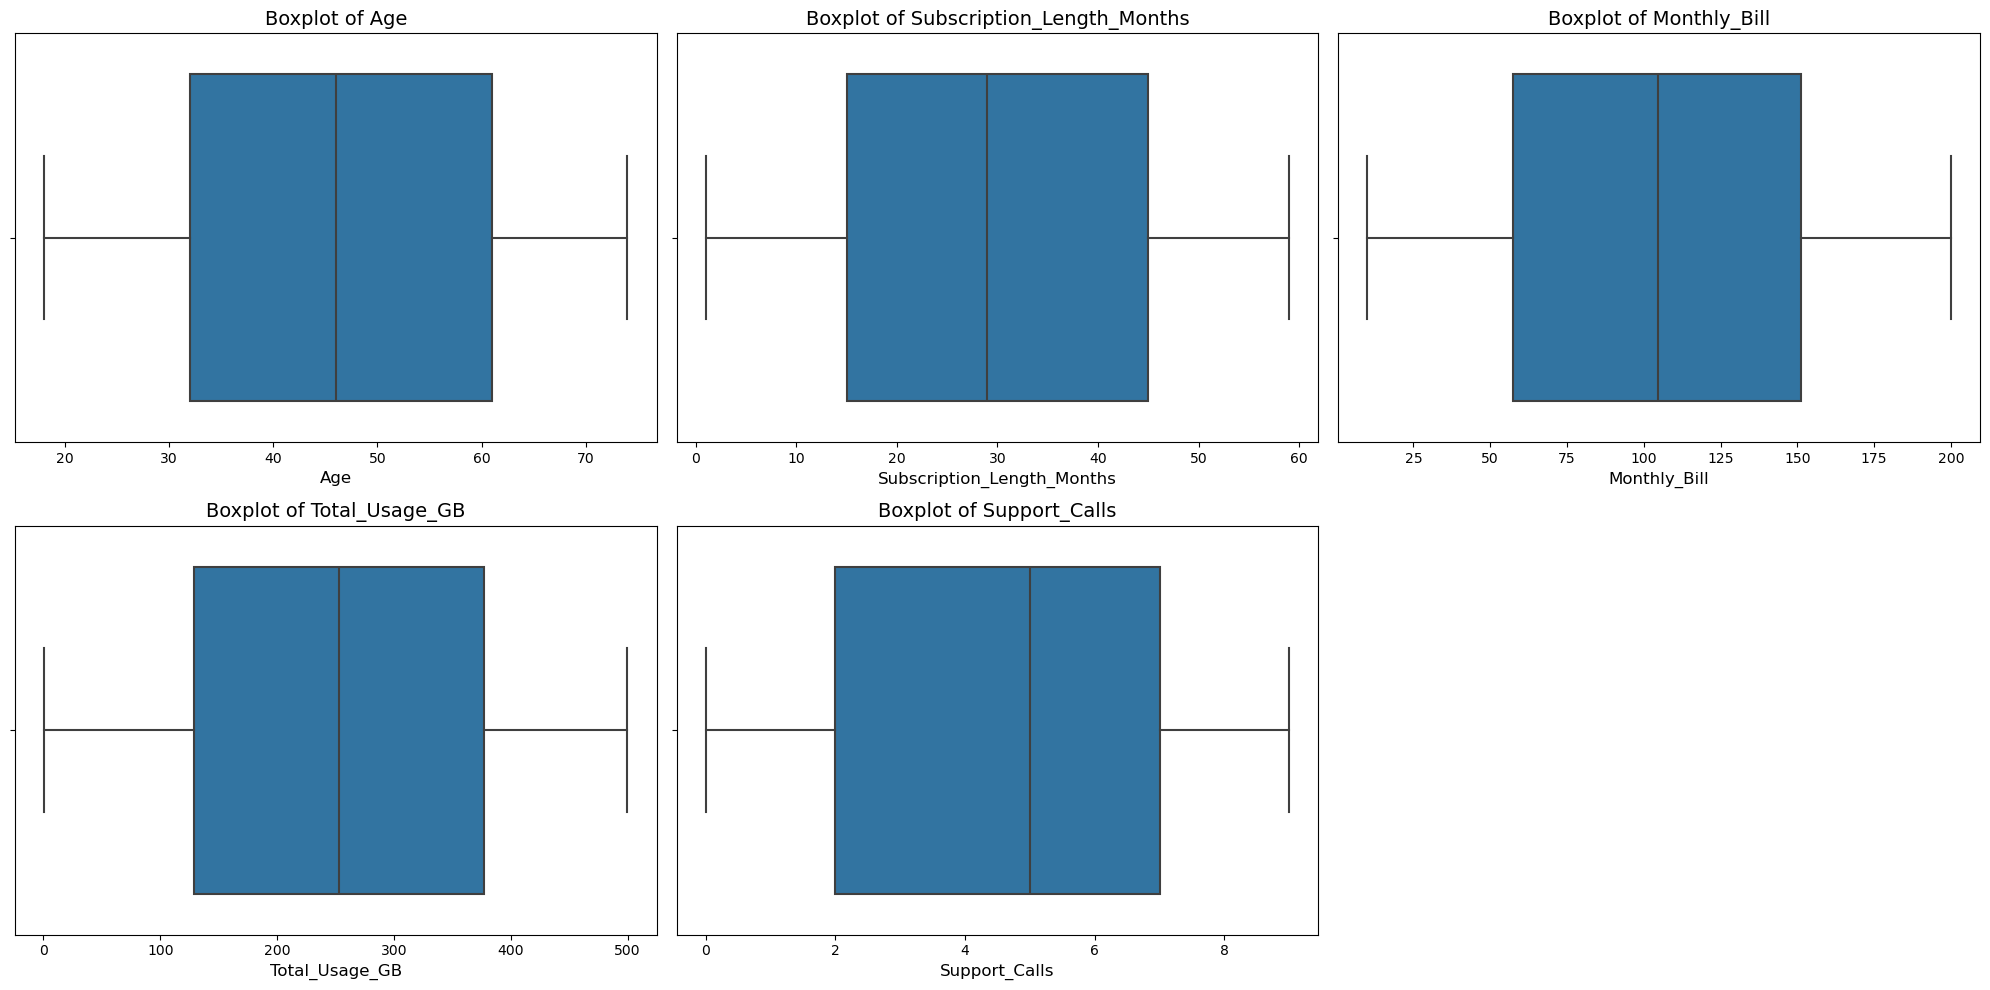

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Support_Calls']

# Create subplots: 2 rows × 3 columns with increased size
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to access via a single loop

# Loop through features and plot boxplots
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Hide any unused subplot if features < total subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

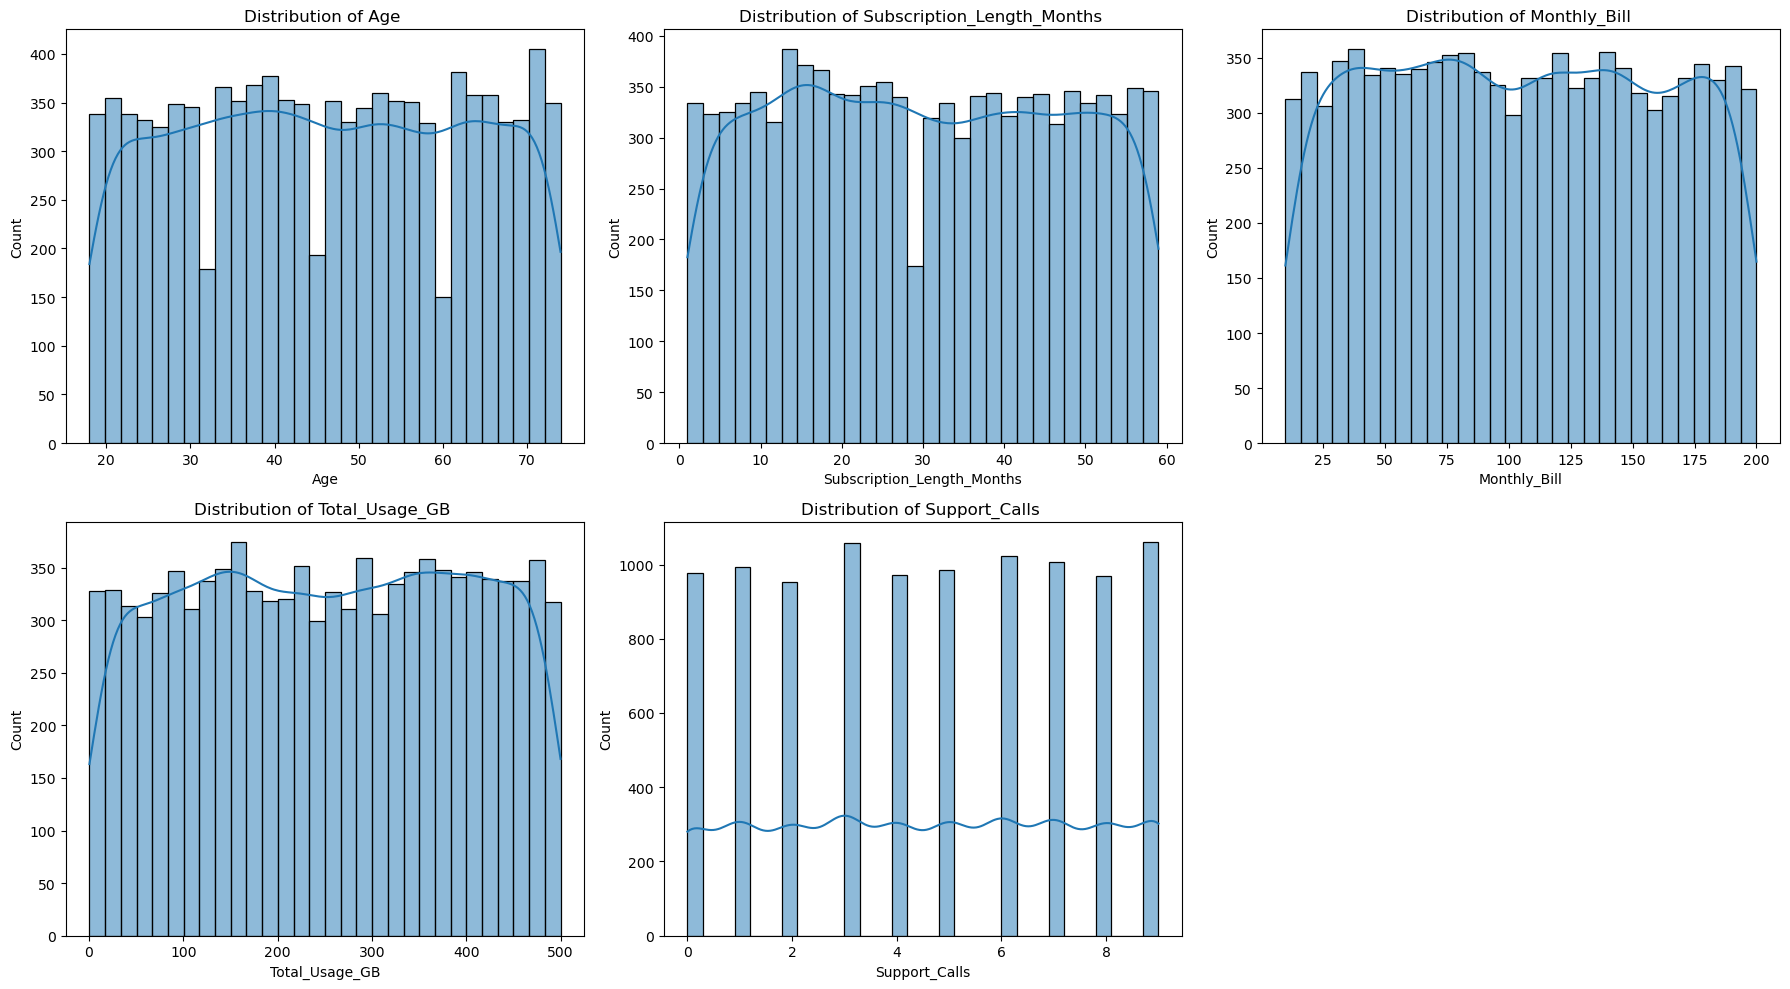

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col} ')

# Remove extra subplot if any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [27]:
X = df.drop(columns='Churn')
y = df['Churn']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(8000, 7)

In [35]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [32]:
import warnings
warnings.filterwarnings("ignore")

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", [
        "RandomForest", "LogisticRegression", "DecisionTree",
        "KNN", "XGBoost", "LightGBM", "CatBoost", "AdaBoost"
    ])

    if classifier_name == "RandomForest":
        clf = RandomForestClassifier(
            n_estimators=trial.suggest_int("rf_n_estimators", 50, 300),
            max_depth=trial.suggest_int("rf_max_depth", 2, 32, log=True),
            random_state=42
        )

    elif classifier_name == "LogisticRegression":
        clf = make_pipeline(
            StandardScaler(),
            LogisticRegression(
                C=trial.suggest_float("lr_C", 1e-3, 1e2, log=True),
                solver="liblinear",
                random_state=42
            )
        )

    elif classifier_name == "DecisionTree":
        clf = DecisionTreeClassifier(
            max_depth=trial.suggest_int("dt_max_depth", 2, 32, log=True),
            min_samples_split=trial.suggest_int("dt_min_samples_split", 2, 20),
            random_state=42
        )

    elif classifier_name == "KNN":
        clf = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=trial.suggest_int("knn_n_neighbors", 3, 15))
        )

    elif classifier_name == "XGBoost":
        clf = XGBClassifier(
            n_estimators=trial.suggest_int("xgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("xgb_learning_rate", 0.01, 0.3),
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

    elif classifier_name == "LightGBM":
        clf = LGBMClassifier(
            n_estimators=trial.suggest_int("lgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("lgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("lgb_learning_rate", 0.01, 0.3),
            random_state=42
        )

    elif classifier_name == "CatBoost":
        clf = CatBoostClassifier(
            iterations=trial.suggest_int("cat_iterations", 50, 300),
            depth=trial.suggest_int("cat_depth", 3, 10),
            learning_rate=trial.suggest_float("cat_learning_rate", 0.01, 0.3),
            verbose=0,
            random_state=42
        )

    elif classifier_name == "AdaBoost":
        clf = AdaBoostClassifier(
            n_estimators=trial.suggest_int("ada_n_estimators", 50, 300),
            learning_rate=trial.suggest_float("ada_learning_rate", 0.01, 1.0),
            random_state=42
        )

    # Evaluate using cross-validation
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3, scoring="accuracy").mean()


In [33]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best result
print("✅ Best Trial:")
print(f"Accuracy: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-04-06 15:53:32,032] A new study created in memory with name: no-name-6860a11c-c259-4113-9c04-d789c048797e
[I 2025-04-06 15:53:38,457] Trial 0 finished with value: 0.7881249933780783 and parameters: {'classifier': 'AdaBoost', 'ada_n_estimators': 50, 'ada_learning_rate': 0.3933830378481535}. Best is trial 0 with value: 0.7881249933780783.
[I 2025-04-06 15:53:41,489] Trial 1 finished with value: 0.7881249933780783 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.36322979303226366}. Best is trial 0 with value: 0.7881249933780783.
[I 2025-04-06 15:53:45,147] Trial 2 finished with value: 0.7441231792762588 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 176, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.24435451887652274}. Best is trial 0 with value: 0.7881249933780783.
[I 2025-04-06 15:53:51,527] Trial 3 finished with value: 0.7511231951219902 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 276, 'lgb_max_depth': 5, 'lgb_learning_rate': 0.1921

✅ Best Trial:
Accuracy: 0.7882499777550311
Params:
  classifier: DecisionTree
  dt_max_depth: 2
  dt_min_samples_split: 18


In [36]:
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }
    
    clf = DecisionTreeClassifier(**params, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=300)  # 50 trials or 5 minutes

# Print best hyperparameters
print("\nBest Parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)

# Train final model on best parameters
best_model = DecisionTreeClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# Test accuracy
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[I 2025-04-06 15:59:12,294] A new study created in memory with name: no-name-7eb0defc-1507-4829-a3db-b5d48d4052b6
[I 2025-04-06 15:59:12,422] Trial 0 finished with value: 0.778625 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'log2'}. Best is trial 0 with value: 0.778625.
[I 2025-04-06 15:59:12,491] Trial 1 finished with value: 0.788 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.788.
[I 2025-04-06 15:59:12,779] Trial 2 finished with value: 0.7785 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_features': None}. Best is trial 1 with value: 0.788.
[I 2025-04-06 15:59:12,855] Trial 3 finished with value: 0.782 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_de


Best Parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_features': 'sqrt'}
Best CV Accuracy: 0.788125
Test Accuracy: 0.794


In [39]:
import pickle

# Save the trained model
with open("ott_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [42]:
import optuna
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import accuracy_score


def objective(trial):
    """Objective function for Optuna to optimize XGBClassifier."""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "lambda": trial.suggest_float("lambda", 0, 5),
        "alpha": trial.suggest_float("alpha", 0, 5),
        "objective": "binary:logistic",  # Use 'multi:softmax' for multi-class classification
        "eval_metric": "logloss",
        "use_label_encoder": False
    }

    # Train XGBClassifier with suggested parameters
    model = xgb.XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Predict and evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    return 1 - accuracy  # Minimize error (maximize accuracy)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")  # Minimize classification error
study.optimize(objective, n_trials=50)

# Get best parameters
print(f"Best parameters: {study.best_params}")


[I 2025-04-06 16:09:36,849] A new study created in memory with name: no-name-7681b13f-eaeb-4c9f-bcc6-6e3b4171f9e2
[I 2025-04-06 16:09:37,776] Trial 0 finished with value: 0.20599999999999996 and parameters: {'n_estimators': 850, 'learning_rate': 0.017676716055168608, 'max_depth': 13, 'min_child_weight': 9, 'subsample': 0.9663771575819574, 'colsample_bytree': 0.7259082143610107, 'gamma': 2.7094535790870773, 'lambda': 0.33432039896305554, 'alpha': 0.8295179099915018}. Best is trial 0 with value: 0.20599999999999996.
[I 2025-04-06 16:09:38,459] Trial 1 finished with value: 0.21199999999999997 and parameters: {'n_estimators': 600, 'learning_rate': 0.12367186555544782, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 0.5142302909908647, 'colsample_bytree': 0.8010346341315276, 'gamma': 1.645308811510563, 'lambda': 3.7244830877608583, 'alpha': 2.1851837907674487}. Best is trial 0 with value: 0.20599999999999996.
[I 2025-04-06 16:09:39,111] Trial 2 finished with value: 0.20599999999999996

Best parameters: {'n_estimators': 850, 'learning_rate': 0.017676716055168608, 'max_depth': 13, 'min_child_weight': 9, 'subsample': 0.9663771575819574, 'colsample_bytree': 0.7259082143610107, 'gamma': 2.7094535790870773, 'lambda': 0.33432039896305554, 'alpha': 0.8295179099915018}


In [43]:
best_params = study.best_params

# Train the final model with optimized parameters
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


Final Model Accuracy: 0.7940


In [44]:
import pickle

# Save the trained model
with open("ott_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [33]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.5 MB 525.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 516.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 583.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 655.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 684.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 684.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.5 MB 700.2 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 716.8 kB/s eta 0:00:02
   ----------

In [46]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_error",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 50),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
    }

    # Train LightGBM model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_metric="logloss", eval_set=[(X_test, y_test)], callbacks=[early_stopping(10), log_evaluation(1)])

    # Predict & evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    return 1 - accuracy  # Optuna minimizes the objective, so we return (1 - accuracy)


In [47]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best parameters found
print("Best parameters:", study.best_params)

[I 2025-02-15 19:25:43,850] A new study created in memory with name: no-name-339e6677-6464-4568-b745-fd04bcaac8d1
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7416257918808059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7416257918808059
[LightGBM] [Warning] lambda_l1 is set=0.06567524024164581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06567524024164581
[LightGBM] [Warning] lambda_l2 is set=0.1002980215328052, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1002980215328052
[LightGBM] [Warning] bagging_fraction is set=0.972406136370964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.972406136370964
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7416257918808059, colsample_bytre

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.510325	valid_0's binary_error: 0.206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[11]	valid_0's binary_logloss: 0.510896	valid_0's binary_error: 0.206
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.509061	valid_0's binary_error: 0.206
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.6454902659121231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6454902659121231
[LightGBM] [Warning] lambda_l1 is set=0.0006100959948175855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006100959948175855
[LightGBM] [Warning] lambda_l2 is set=6.712653302658415e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.712653302658415e-08
[LightGBM] [Warning] bagging_fraction is set=0.6498

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.986490607965683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.986490607965683
[LightGBM] [Warning] lambda_l1 is set=2.2223775843731043e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2223775843731043e-08
[LightGBM] [Warning] lambda_l2 is set=6.300285233998752e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.300285233998752e-06
[LightGBM] [Warning] bagging_fraction is set=0.6018097489322238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6018097489322238
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.986490607965683, cols

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6832559344395834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6832559344395834
[LightGBM] [Warning] lambda_l1 is set=3.183693515912166e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.183693515912166e-05
[LightGBM] [Warning] lambda_l2 is set=1.0249201326750515e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0249201326750515e-06
[LightGBM] [Warning] bagging_fraction is set=0.9886658307141019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9886658307141019
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6832559344395834, c

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.7329878381110371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7329878381110371
[LightGBM] [Warning] lambda_l1 is set=5.13248558078144e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.13248558078144e-06
[LightGBM] [Warning] lambda_l2 is set=8.745534073688525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.745534073688525
[LightGBM] [Warning] bagging_fraction is set=0.7622752691094659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7622752691094659
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.7329878381110371, colsample_b

[I 2025-02-15 19:25:45,555] Trial 15 finished with value: 0.20599999999999996 and parameters: {'learning_rate': 0.06953368930934174, 'num_leaves': 82, 'max_depth': 3, 'min_data_in_leaf': 11, 'feature_fraction': 0.7405071406600452, 'bagging_fraction': 0.942977522662068, 'bagging_freq': 8, 'lambda_l1': 0.4398455588203682, 'lambda_l2': 2.180160972965319e-06}. Best is trial 0 with value: 0.20599999999999996.
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7405071406600452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7405071406600452
[LightGBM] [Warning] lambda_l1 is set=0.4398455588203682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4398455588203682
[LightGBM] [Warning] lambda_l2 is set=2.180160972965319e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.180160972965319e-06
[LightGBM] [Warning] bagging_fraction is set=0.942977522662068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.942977522662068
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7405071406600452, colsample_b

[I 2025-02-15 19:25:45,823] Trial 17 finished with value: 0.20599999999999996 and parameters: {'learning_rate': 0.07773033973817091, 'num_leaves': 24, 'max_depth': 5, 'min_data_in_leaf': 34, 'feature_fraction': 0.7898181499390814, 'bagging_fraction': 0.6957204877333496, 'bagging_freq': 6, 'lambda_l1': 1.814386169902896e-05, 'lambda_l2': 0.11522668777807676}. Best is trial 0 with value: 0.20599999999999996.
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.7898181499390814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7898181499390814
[LightGBM] [Warning] lambda_l1 is set=1.814386169902896e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.814386169902896e-05
[LightGBM] [Warning] lambda_l2 is set=0.11522668777807676, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11522668777807676
[LightGBM] [Warning] bagging_fraction is set=0.6957204877333496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6957204877333496
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.7898181499390814, colsamp

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.7080649289235946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7080649289235946
[LightGBM] [Warning] lambda_l1 is set=0.2905555248621703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2905555248621703
[LightGBM] [Warning] lambda_l2 is set=1.93587179613063e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.93587179613063e-07
[LightGBM] [Warning] bagging_fraction is set=0.9826241662199484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9826241662199484
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.7080649289235946, colsample_b

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.8579975658955403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8579975658955403
[LightGBM] [Warning] lambda_l1 is set=0.008992095932068423, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008992095932068423
[LightGBM] [Warning] lambda_l2 is set=0.0036170596587033316, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036170596587033316
[LightGBM] [Warning] bagging_fraction is set=0.8999003264998406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8999003264998406
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.8579975658955403, colsa

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.8974068712095608, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8974068712095608
[LightGBM] [Warning] lambda_l1 is set=0.04167871239023017, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04167871239023017
[LightGBM] [Warning] lambda_l2 is set=0.0006509864098250989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006509864098250989
[LightGBM] [Warning] bagging_fraction is set=0.938683127279587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.938683127279587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.8974068712095608, colsample

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.9127524670668095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9127524670668095
[LightGBM] [Warning] lambda_l1 is set=0.49455315880307155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49455315880307155
[LightGBM] [Warning] lambda_l2 is set=1.4032559546238725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4032559546238725
[LightGBM] [Warning] bagging_fraction is set=0.9636007819542838, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9636007819542838
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.9127524670668095, colsample_byt

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.7573882363180039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573882363180039
[LightGBM] [Warning] lambda_l1 is set=0.1176160142899211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1176160142899211
[LightGBM] [Warning] lambda_l2 is set=0.004240337297249717, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004240337297249717
[LightGBM] [Warning] bagging_fraction is set=0.9044405475435222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9044405475435222
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.7573882363180039, colsample_b

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.6541097964230445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6541097964230445
[LightGBM] [Warning] lambda_l1 is set=0.0008559174457693692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008559174457693692
[LightGBM] [Warning] lambda_l2 is set=1.577472470088125e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.577472470088125e-07
[LightGBM] [Warning] bagging_fraction is set=0.8819050930712954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8819050930712954
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.6541097964230445, col

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.5401301129916181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5401301129916181
[LightGBM] [Warning] lambda_l1 is set=0.0002609508883040656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002609508883040656
[LightGBM] [Warning] lambda_l2 is set=9.873953587128586e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.873953587128586e-08
[LightGBM] [Warning] bagging_fraction is set=0.6109736418520115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6109736418520115
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.5401301129916181, col

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.6439047707352363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6439047707352363
[LightGBM] [Warning] lambda_l1 is set=0.013928143257528782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013928143257528782
[LightGBM] [Warning] lambda_l2 is set=6.113127897641808e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.113127897641808e-07
[LightGBM] [Warning] bagging_fraction is set=0.5174048654405956, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5174048654405956
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.6439047707352363, colsa

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.6810054047983765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6810054047983765
[LightGBM] [Warning] lambda_l1 is set=0.0011546616877342098, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011546616877342098
[LightGBM] [Warning] lambda_l2 is set=0.00010013169785182057, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010013169785182057
[LightGBM] [Warning] bagging_fraction is set=0.713417847936991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.713417847936991
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.6810054047983765, col

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.9558872990908697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9558872990908697
[LightGBM] [Warning] lambda_l1 is set=0.0005735150294288353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005735150294288353
[LightGBM] [Warning] lambda_l2 is set=2.880041324801619e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.880041324801619e-06
[LightGBM] [Warning] bagging_fraction is set=0.8640088925985906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8640088925985906
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.9558872990908697, col

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.8206555493012211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8206555493012211
[LightGBM] [Warning] lambda_l1 is set=0.10999680529348291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10999680529348291
[LightGBM] [Warning] lambda_l2 is set=1.3378419590256453e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3378419590256453e-05
[LightGBM] [Warning] bagging_fraction is set=0.9259523572882217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9259523572882217
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.8206555493012211, colsa

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.528124318417206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.528124318417206
[LightGBM] [Warning] lambda_l1 is set=1.3870923359710007e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3870923359710007e-07
[LightGBM] [Warning] lambda_l2 is set=0.00022596669709006763, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022596669709006763
[LightGBM] [Warning] bagging_fraction is set=0.6612826991000937, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6612826991000937
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.528124318417206, co

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.7632544788963732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7632544788963732
[LightGBM] [Warning] lambda_l1 is set=1.0785766141479555e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0785766141479555e-08
[LightGBM] [Warning] lambda_l2 is set=1.0621603298739431e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0621603298739431e-08
[LightGBM] [Warning] bagging_fraction is set=0.5447191833551336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5447191833551336
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.7632544788963732, col

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.5748564249062494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748564249062494
[LightGBM] [Warning] lambda_l1 is set=5.686725895019151e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.686725895019151e-06
[LightGBM] [Warning] lambda_l2 is set=3.919185969733164e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.919185969733164e-05
[LightGBM] [Warning] bagging_fraction is set=0.962106196451541, subsample=1.0 will be ignored. Current value: bagging_fraction=0.962106196451541
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.5748564249062494, colsa

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_l1": trial.suggest_loguniform("lambda_l

[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.62151110302839, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.62151110302839
[LightGBM] [Warning] lambda_l1 is set=7.016041465915305e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.016041465915305e-05
[LightGBM] [Warning] lambda_l2 is set=0.029170223365601405, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029170223365601405
[LightGBM] [Warning] bagging_fraction is set=0.5010709885295902, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5010709885295902
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.62151110302839, colsample_b

C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_12400\1781945410.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bagging

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.6907120817356843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6907120817356843
[LightGBM] [Warning] lambda_l1 is set=0.27236928409329353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27236928409329353
[LightGBM] [Warning] lambda_l2 is set=0.0010064641150774722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010064641150774722
[LightGBM] [Warning] bagging_fraction is set=0.909132633332406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.909132633332406
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.6907120817356843, colsample

In [49]:
best_params = {
    'learning_rate': 0.17796508323626273,
    'num_leaves': 27,
    'max_depth': 5,
    'min_data_in_leaf': 19,
    'feature_fraction': 0.7416257918808059,
    'bagging_fraction': 0.972406136370964,
    'bagging_freq': 2,
    'lambda_l1': 0.06567524024164581,
    'lambda_l2': 0.1002980215328052,
    'objective': 'binary'  # or 'multiclass' if you have more than 2 classes
}

# Train the final model with best parameters
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train, eval_metric="logloss", eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(10)])

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7416257918808059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7416257918808059
[LightGBM] [Warning] lambda_l1 is set=0.06567524024164581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06567524024164581
[LightGBM] [Warning] lambda_l2 is set=0.1002980215328052, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1002980215328052
[LightGBM] [Warning] bagging_fraction is set=0.972406136370964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.972406136370964
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7416257918808059, colsample_bytre

In [23]:
!pip install optuna

   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/383.6 kB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 92.2/383.6 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 194.6/383.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  378.9/383.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 383.6/383.6 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.6 kB ? eta -:--:--
   --------------------------------------- 233.6/233.6 kB 14.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00


In [29]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Define model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # Optuna will maximize this metric


In [30]:
# Create Optuna study
study = optuna.create_study(direction="maximize")  # We want to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials

# Print best parameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-02-15 17:39:51,228] A new study created in memory with name: no-name-c46a6760-c835-48b4-9129-cfc0d5b3b73f
[I 2025-02-15 17:39:51,854] Trial 0 finished with value: 0.794 and parameters: {'n_estimators': 55, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.794.
[I 2025-02-15 17:39:52,939] Trial 1 finished with value: 0.794 and parameters: {'n_estimators': 85, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.794.
[I 2025-02-15 17:39:56,075] Trial 2 finished with value: 0.794 and parameters: {'n_estimators': 274, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.794.
[I 2025-02-15 17:39:58,352] Trial 3 finished with value: 0.794 and parameters: {'n_estimators': 277, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.794.
[I 2025-02-15 17:40:00,649] Trial 4 finished with value: 0.794 and parameters: {'n_e

Best hyperparameters: {'n_estimators': 55, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 5}
Best accuracy: 0.794


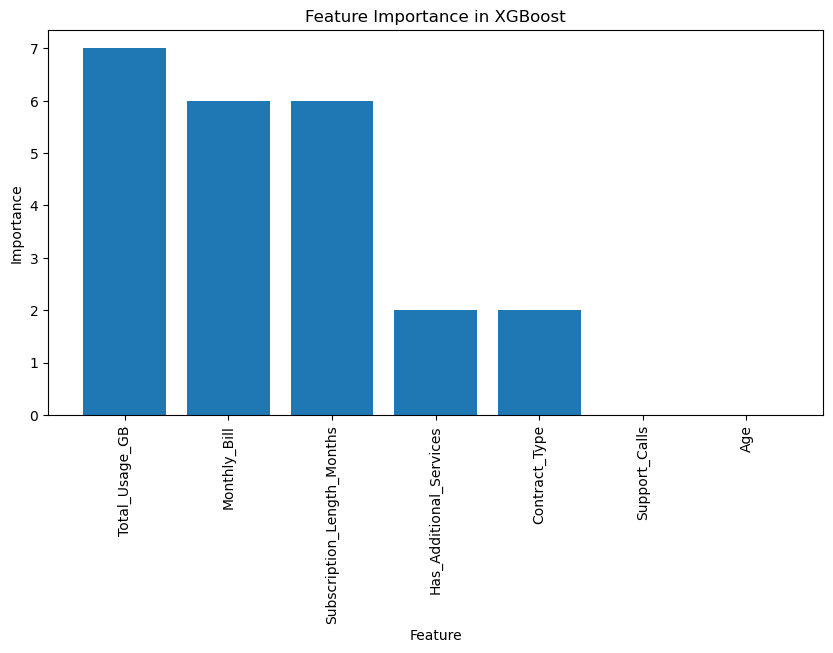

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = model.feature_importances_

# Get feature names (if using Pandas DataFrame)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in XGBoost")
plt.show()
